In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import joypy

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42

In [2]:
tissue_directory = pd.read_csv(
    "/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Final_species_RNA_data/sample_to_tissue.csv",
    sep="\t",
)
tissue_directory = tissue_directory.replace(
    {
        "apices": "Apex",
        "coty": "Cotyledon",
        "In": "Inflorescence",
        "leaves": "Leaf",
        "hypo": "Hypocotyl",
        "pric": "Prickle",
        "fruit": "Fruit",
        "flower": "Flower",
        "meristem": "Meristem",
    }
)
tissue_directory

,Species,Sample,Tissue,Sample Name,Total Reads,% Uniquely mapped,% multimapped,% unmapped,Fastq Path Paried Read1,Fastq Path Paired Read 2
0,abutiloides,Sabu2,Apex,Sabu2_apices_2_S11,46869976.0,88.2758,3.39319,8.33102,/grid/lippman/data/pansol/abutiloides/Sabu2/da...,/grid/lippman/data/pansol/abutiloides/Sabu2/da...
1,abutiloides,Sabu2,Apex,Sabu2_apices_3_S17,42814613.0,86.7834,3.17339,10.04320,/grid/lippman/data/pansol/abutiloides/Sabu2/da...,/grid/lippman/data/pansol/abutiloides/Sabu2/da...
2,aethiopicum,Saet3,Apex,Saet3_apices_1_S1,31885899.0,88.5922,4.63972,6.76812,/grid/lippman/data/pansol/aethiopicum/Saet3/da...,/grid/lippman/data/pansol/aethiopicum/Saet3/da...
3,aethiopicum,Saet3,Apex,Saet3_apices_2_S2,31235923.0,88.5767,4.57639,6.84692,/grid/lippman/data/pansol/aethiopicum/Saet3/da...,/grid/lippman/data/pansol/aethiopicum/Saet3/da...
4,aethiopicum,Saet3,Apex,Saet3_apices_3_S3,31476966.0,88.9584,4.59573,6.44585,/grid/lippman/data/pansol/aethiopicum/Saet3/da...,/grid/lippman/data/pansol/aethiopicum/Saet3/da...
...,...,...,...,...,...,...,...,...,...,...
258,lycopercicum,M82,Meristem,M82_SIM2,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...
259,lycopercicum,M82,Meristem,M82_SYM1,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...
260,lycopercicum,M82,Meristem,M82_SYM2,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...
261,lycopercicum,M82,Meristem,M82_TM1,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...


In [3]:
species_list = tissue_directory["Species"].unique().tolist()
species_list.remove("aethiopicum")
species_list.remove("lycopercicum")

species_list

['abutiloides',
 'americanum',
 'anguivi',
 'candidum',
 'citrullifolium',
 'cleistogamum',
 'etuberosum',
 'giganteum',
 'havanense',
 'insanum',
 'linearifolium',
 'macrocarpon',
 'mammosum',
 'muricatum1',
 'muricatum2',
 'prinophyllum',
 'pseudolulo',
 'quitoense',
 'robustum',
 'stramoniifolium',
 'torvum',
 'violaceum']

In [4]:
all_species_dict = {}
for species in species_list:
    current_tissue = tissue_directory.loc[tissue_directory["Species"] == species]
    current_species = current_tissue["Sample"].iloc[0]
    current_rna = "/data/suresh/pansol/counts/" + current_species + "_TPM_counts.csv"
    rna_counts = pd.read_csv(current_rna)
    for sample in rna_counts.columns:
        split_sample = sample.split("_")[-1] + "$"
        tissue_type = current_tissue["Tissue"].loc[
            current_tissue["Sample Name"].str.contains(split_sample, regex=True)
        ]
        if len(tissue_type) != 1:
            split_sample_start = sample.split("_")[1]
            tissue_type = current_tissue["Tissue"].loc[
                current_tissue["Sample Name"].str.contains(split_sample_start)
            ]
            if len(tissue_type) != 1:
                tissue_type = current_tissue["Tissue"].loc[
                    current_tissue["Fastq Path Paried Read1"].str.contains(sample)
                ]
                if len(tissue_type) != 1:
                    raise Exception("No single match")
        all_species_dict[sample] = tissue_type.item()

In [5]:
sabu_dict_of_tissues = {"Sabu2-2_S11": "Apex", "Sabu2-3_S17": "Apex"}
saet_list_of_sample_tissue = {
    "Saet-1_S1": "Cotyledon",
    "Saet-1_S3": "Inflorescence",
    "Saet-1_S53": "Hypocotyl",
    "Saet-1_S56": "Leaf",
    "Saet-2_S2": "Cotyledon",
    "Saet-2_S4": "Inflorescence",
    "Saet-2_S54": "Hypocotyl",
    "Saet-2_S57": "Leaf",
    "Saet-3_S3": "Cotyledon",
    "Saet-3_S55": "Hypocotyl",
    "Saet-3_S58": "Leaf",
    "Saet-3_S5": "Inflorescence",
    "Saet-4_S4": "Cotyledon",
    "Saet-4_S56": "Hypocotyl",
    "Saet-4_S6": "Inflorescence",
    "Saet3-1_S1": "Apex",
    "Saet3-2_S2": "Apex",
    "Saet3-3_S3": "Apex",
    "Saet3-4_S4": "Apex",
    "Saet3-5_S5": "Apex",
    "Saet3-6_S6": "Apex",
}

In [6]:
full_column_to_tissue_dict = {
    **saet_list_of_sample_tissue,
    **sabu_dict_of_tissues,
    **all_species_dict,
}
full_column_to_tissue_dict

{'Saet-1_S1': 'Cotyledon',
 'Saet-1_S3': 'Inflorescence',
 'Saet-1_S53': 'Hypocotyl',
 'Saet-1_S56': 'Leaf',
 'Saet-2_S2': 'Cotyledon',
 'Saet-2_S4': 'Inflorescence',
 'Saet-2_S54': 'Hypocotyl',
 'Saet-2_S57': 'Leaf',
 'Saet-3_S3': 'Cotyledon',
 'Saet-3_S55': 'Hypocotyl',
 'Saet-3_S58': 'Leaf',
 'Saet-3_S5': 'Inflorescence',
 'Saet-4_S4': 'Cotyledon',
 'Saet-4_S56': 'Hypocotyl',
 'Saet-4_S6': 'Inflorescence',
 'Saet3-1_S1': 'Apex',
 'Saet3-2_S2': 'Apex',
 'Saet3-3_S3': 'Apex',
 'Saet3-4_S4': 'Apex',
 'Saet3-5_S5': 'Apex',
 'Saet3-6_S6': 'Apex',
 'Sabu2-2_S11': 'Apex',
 'Sabu2-3_S17': 'Apex',
 'AvrRps4_S196_L003': 'S196',
 'EV_S195_L003': 'S195',
 'MgCl2_S194_L003': 'S194',
 'Same-1_S57': 'Hypocotyl',
 'Same-1_S5': 'Cotyledon',
 'Same-2_S58': 'Hypocotyl',
 'Same-2_S6': 'Cotyledon',
 'Same-3_S59': 'Hypocotyl',
 'Same-3_S7': 'Cotyledon',
 'Same-4_S60': 'Hypocotyl',
 'Same-4_S8': 'Cotyledon',
 'Same3-1_S13': 'Apex',
 'Same3-2_S14': 'Apex',
 'Same3-3_S18': 'Apex',
 'SP2273_RNA_pool': 'RNA',

In [8]:
sensible_species_names = {
    "Solabu2_1.1.2": "abutiloides",
    "Solaet3_1.5.2": "aethiopicum",
    "Solame3_1.1.2": "americanum",
    "Solang8_1.1.2": "anguivi",
    "Solcan1_1.1.2": "candidum",
    "Solcit1_1.1.2": "citrullifolium",
    "Solcle2_1.2.2": "cleistogamum",
    "Soletu1_1.2.2": "etuberosum",
    "Solgig1_1.2.2": "giganteum",
    "Solhav1_1.2.2": "havanense",
    "Solins1_1.1.2": "insanum",
    "Sollin1_1.2.2": "linearifolium",
    "Solmac3_1.5.2": "macrocarpon",
    "Solmam1_1.1.2": "mammosum",
    "Solmur2hap1_1.3.2" : "muricatum1",
    "Solmur2hap2_1.3.2": "muricatum2",
    "Solpri1_1.3.2": "prinophyllum",
    "Solpse1_1.1.2.3.2": "pseudolulo",
    "Solqui2_1.3.2": "quitoense",
    "Solrob1_1.2.2": "robustum",
    "Solstr1_1.1.2": "stramoniifolium",
    "Soltor1_1.1.2": "torvum",
    "Solvio1_1.1.2": "violaceum",
}

In [9]:
sample_names = tissue_directory[['Species','Sample']].drop_duplicates()
sample_names = sample_names[:-1]
sample_names

,Species,Sample
0,abutiloides,Sabu2
2,aethiopicum,Saet3
23,americanum,Same3
38,anguivi,Sang8
54,candidum,Scan1
70,citrullifolium,Scit1
87,cleistogamum,Scle2
99,etuberosum,Setu1
106,giganteum,Sgig1
109,havanense,Shav1


In [56]:
all_reads = pd.DataFrame(columns = ['variable','value','Species'])
for species in sample_names.iterrows():
    sample_id = species[1][1]
    species_id = species[1][0]
    file_name = (
        "/data/suresh/pansol/counts/"
        + sample_id
        + "_TPM_counts.csv"
        )
    current_rna_file = pd.read_csv(file_name)
    current_rna_file.index = current_rna_file.index.str.split(":").str[1]
    melted_rna = current_rna_file.melt()
    melted_rna['Species'] = species_id
    all_reads = pd.concat([all_reads,melted_rna])
    
    # avg_expression = pd.DataFrame(current_rna_file.mean(axis = 1), columns = ['Avg Expression'])
    # current_species_genes = gene_ortho_map.loc[gene_ortho_map['Species'] == species_id]
    # added_ortho = avg_expression.merge(right = current_species_genes[['Gene Name','Orthogroup']], left_index= True, right_on= 'Gene Name')
    # ortho_avgs = added_ortho.groupby('Orthogroup').mean()
    # ortho_expression_frame = ortho_expression_frame.merge(how = 'left', right = ortho_avgs, left_index= True,right_index= True).rename(columns = {'Avg Expression':species_id})

In [68]:
all_reads

,variable,value,Species
0,Sabu2-2_S11,0.0,abutiloides
1,Sabu2-2_S11,48.576613,abutiloides
2,Sabu2-2_S11,11.180957,abutiloides
3,Sabu2-2_S11,8.472144,abutiloides
4,Sabu2-2_S11,481.712763,abutiloides
...,...,...,...
110287,Sang7-3_S9,0.0,violaceum
110288,Sang7-3_S9,0.0,violaceum
110289,Sang7-3_S9,0.0,violaceum
110290,Sang7-3_S9,0.0,violaceum


In [79]:
all_reads.loc[all_reads['value']>2.5]

,variable,value,Species
1,Sabu2-2_S11,48.576613,abutiloides
2,Sabu2-2_S11,11.180957,abutiloides
3,Sabu2-2_S11,8.472144,abutiloides
4,Sabu2-2_S11,481.712763,abutiloides
5,Sabu2-2_S11,92.57971,abutiloides
...,...,...,...
109863,Sang7-3_S9,7.998642,violaceum
109898,Sang7-3_S9,7.501031,violaceum
110052,Sang7-3_S9,4.07208,violaceum
110211,Sang7-3_S9,3.539812,violaceum


(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

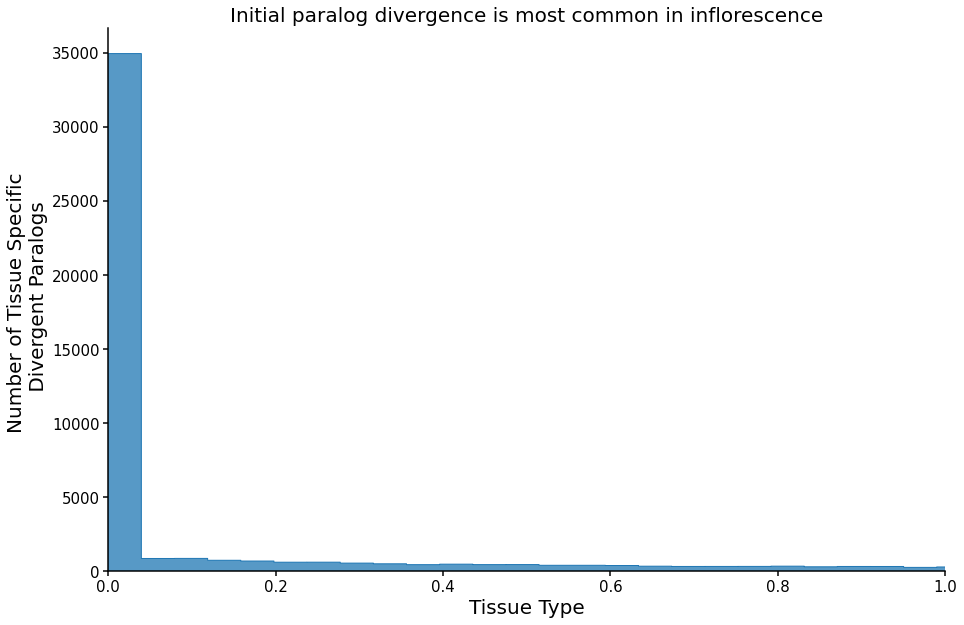

In [67]:
fig, ax = plt.subplots(figsize = (15,10))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = all_reads.sample(100000).reset_index(drop = True), x = "value", element = 'step', bins = 1000000)
plt.ylabel("Number of Tissue Specific \n Divergent Paralogs", fontsize = 20)
plt.xlabel("Tissue Type", fontsize = 20)
#plt.ylim((0,280))
plt.xlim((0,1))
sns.despine()
ax.spines['bottom'].set_linewidth(1.5)
ax.spines["bottom"].set_color("black")
ax.spines['left'].set_linewidth(1.5)
ax.spines["left"].set_color("black")
ax.xaxis.set_tick_params(width=1.5, length = 5)
ax.yaxis.set_tick_params(width=1.5, length = 5)
plt.title("Initial paralog divergence is most common in inflorescence", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

<AxesSubplot:xlabel='value', ylabel='Count'>

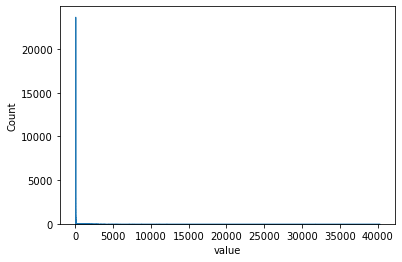

In [30]:
sns.histplot(data = all_reads, x = "value", element = 'step')

<AxesSubplot:xlabel='value', ylabel='Count'>

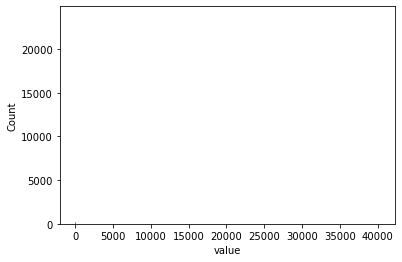

In [29]:
sns.histplot(data = all_reads, x = "value")

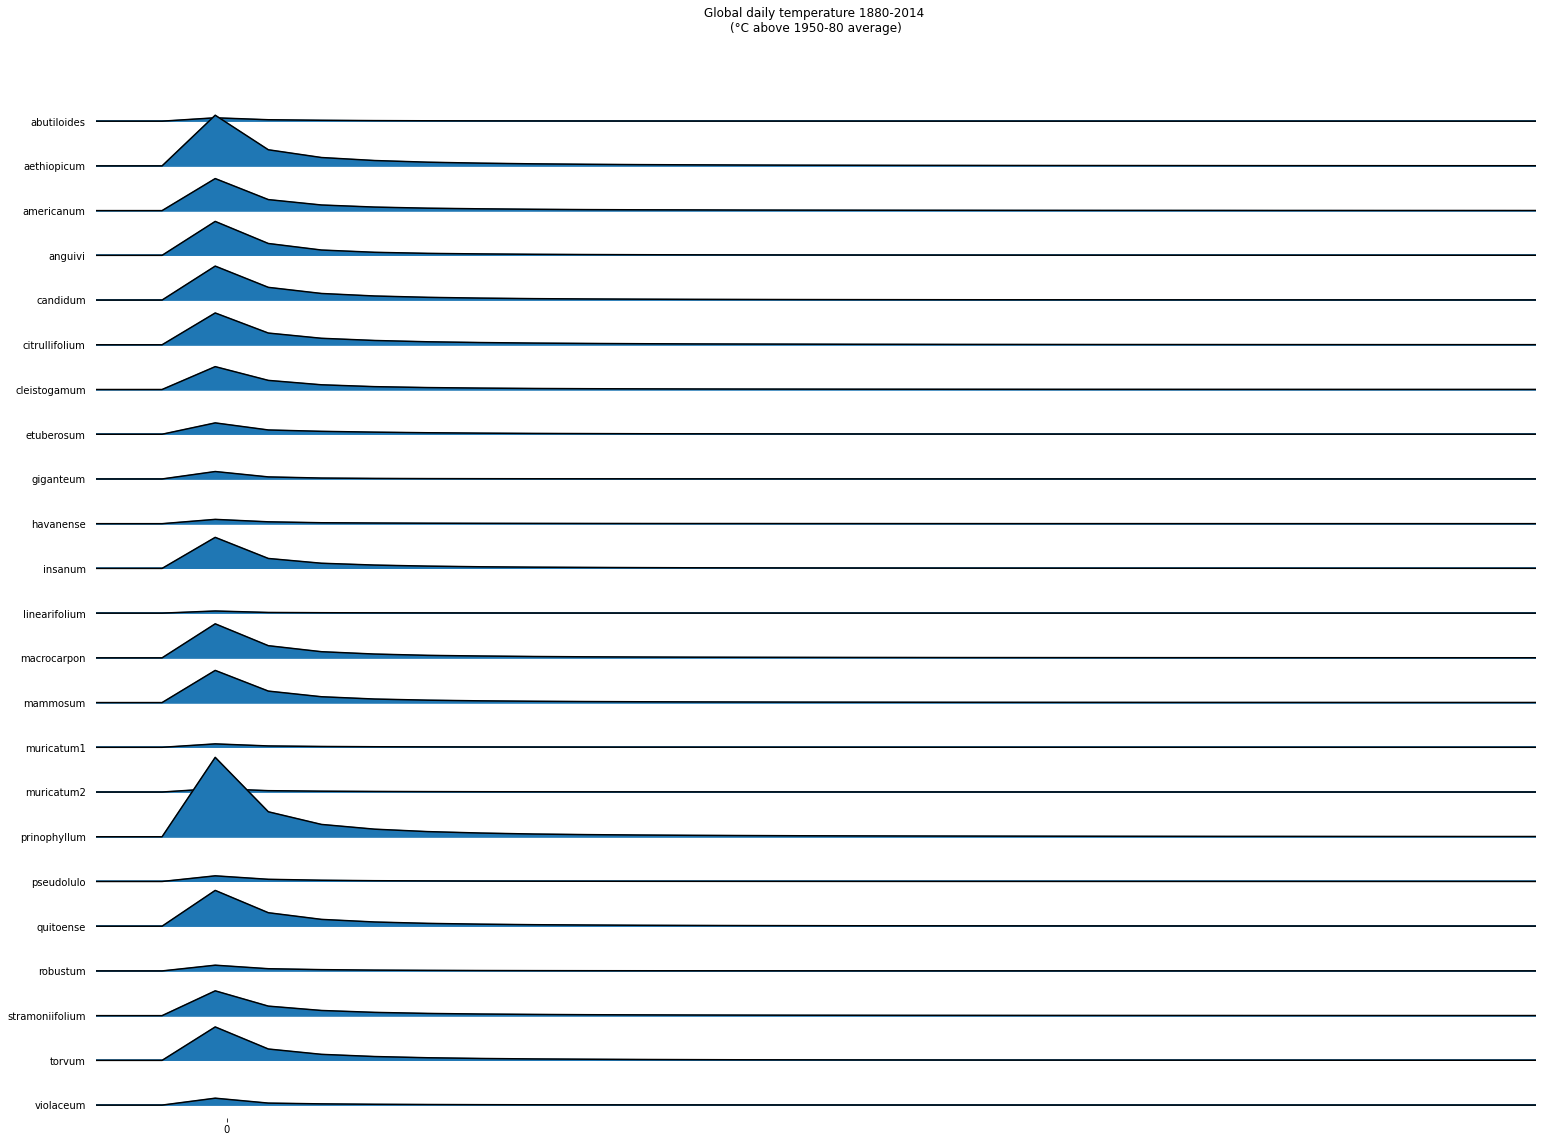

In [49]:
fig, axes = joypy.joyplot(all_reads, by="Species", column="value", figsize=(20,15),
                          title="Global daily temperature 1880-2014 \n(°C above 1950-80 average)", kind = 'counts', bins = 100000)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for a in axes:
    a.set_xlim([-10,100])  